# groupby

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

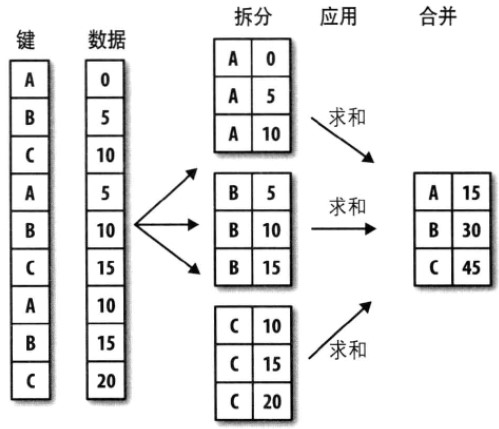

In [6]:
from IPython.display import Image
Image(filename="C:/Users/zty/Desktop/groupby.jpg",width=300,height=400)

In [10]:
df = pd.DataFrame({"key1":["a","a","b","b","a"],"key2":["one","two","one","two","one"],
                   "data1":np.random.randn(5),"data2":np.random.randn(5)})
df["data1"].groupby([df["key1"],df["key2"]]).mean()

key1  key2
a     one     0.308932
      two     1.118340
b     one     1.476392
      two    -0.602340
Name: data1, dtype: float64

<Figure size 800x640 with 0 Axes>

Text(0.5, 1.0, 'Box Plot of Highway Mileage by Vehicle Class')

(10, 40)

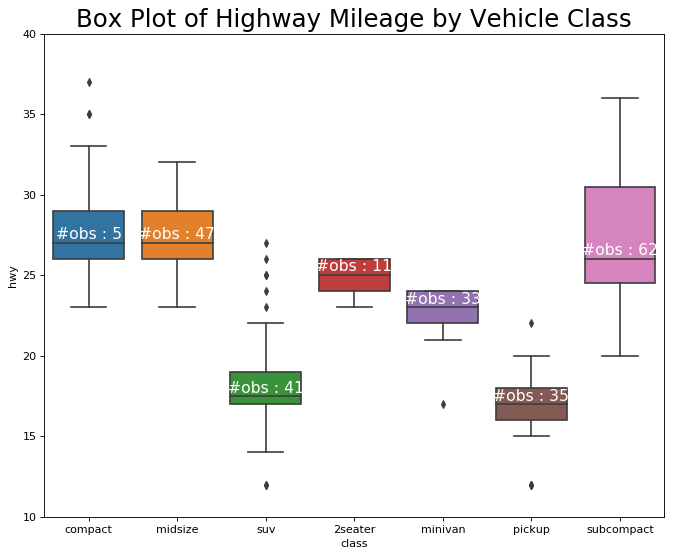

In [4]:
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

plt.figure(figsize=(10,8), dpi= 80)
sns.boxplot(x='class', y='hwy', data=df, notch=False)

def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values
    for (x, xticklabel), n_ob in zip(enumerate(xticklabels), n_obs):
        plt.text(x, medians_dict[xticklabel]*1.01, "#obs : "+str(n_ob), horizontalalignment='center', fontdict={'size':14}, color='white')

add_n_obs(df,group_col='class',y='hwy')    

plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.ylim(10, 40)

## 以无索引形式返回聚合数据

In [18]:
df.groupby([df["key1"],df["key2"]],as_index=False).mean()

,key1,key2,data1,data2
0,a,one,0.308932,0.267157
1,a,two,1.118340,0.220481
2,b,one,1.476392,-1.750662
3,b,two,-0.602340,0.616658


## 对分组进行迭代

In [12]:
for (k1,k2),group in df.groupby(["key1","key2"]):
    print(k1,k2)
    print("----")
    print(group)

a one
----
      data1     data2 key1 key2
0 -0.742927  0.124212    a  one
4  1.360790  0.410103    a  one
a two
----
     data1     data2 key1 key2
1  1.11834  0.220481    a  two
b one
----
      data1     data2 key1 key2
2  1.476392 -1.750662    b  one
b two
----
     data1     data2 key1 key2
3 -0.60234  0.616658    b  two


## agg 支持多种运算

In [14]:
df["data1"].groupby([df["key1"],df["key2"]]).agg([np.mean,np.std,np.sum])

mean       std       sum
key1 key2                              
a    one   0.308932  1.487552  0.617863
     two   1.118340       NaN  1.118340
b    one   1.476392       NaN  1.476392
     two  -0.602340       NaN -0.602340

# apply
apply()：沿着DataFrame某行或某列应用函数（配合lambda使用）
>df.apply(lambda x:x!=x[0],axis=1)

applymap()：对DataFrame每个元素进行函数应用
>df[[“销售”,”人员数量”]].applymap(lambda x:”%.2f” %x)

map()：对Series每个元素进行函数应用
>df[“销售”].map(lambda x:”%.2f” %x)

# 分位数和桶分析
cut(x, bins, right=True, labels=None)
>等距切割
>#如果labels不写，系统就会自动返回每一段的原始名称
>#merge_df["x_bin"] = pd.cut(merge_df["gene_mean"], bins, labels=range(bins))

qcut(x, q, labels=None)
>等比例切割（也可以自行制定分割比例）
>#pd.qcut(df,[0,0.1,0.5,0.9,1]) 拆分成10%，40%，40%，10%

# pandas广播
默认在行上广播
>DataFrame和Series间的算术运算会将Series的索引匹配到DataFrame的列上

如果匹配行且在列上广播
>则必须使用算术运算方法（add sub mul div）

示例：

在行上进行广播 
>frame-series

在列上进行广播  
>frame.sub(series1,axis=0)

In [19]:
test_df = pd.DataFrame(np.arange(9).reshape(3,3),columns=["a","b","c"])
test_df

,a,b,c
0,0,1,2
1,3,4,5
2,6,7,8


In [29]:
mean = [3,4,5]
test_df - mean

,a,b,c
0,-3,-3,-3
1,0,0,0
2,3,3,3


In [30]:
test_df.sub(mean,axis=0)

,a,b,c
0,-3,-2,-1
1,-1,0,1
2,1,2,3


# 窗函数 rolling

DataFrame.rolling(window, min_periods=None, freq=None, center=False, win_type=None, on=None, axis=0)
> window: 移动窗口的大小，值可以是int或offset（index是时间类型数据时才可以使用）

> min_periods: 每个窗口最少包含的观测值数量

> win_type：None默认每个值权重相同

In [10]:
df = pd.DataFrame(np.random.randn(7, 4),
                  index = pd.date_range('1/1/2020', periods=7),
                  columns = ['A', 'B', 'C', 'D'])
df

,A,B,C,D
2020-01-01,-1.775098,-0.711480,-0.596735,0.288448
2020-01-02,-0.276247,1.264879,0.930318,1.365613
2020-01-03,-1.687857,-0.395672,-0.659791,1.291984
2020-01-04,0.963031,0.525204,0.094718,2.899588
2020-01-05,0.182614,-1.119979,-0.842614,-1.119928
2020-01-06,0.643995,1.282839,-0.479573,0.265809
2020-01-07,0.288901,0.417070,0.023819,-0.631008


In [11]:
df.rolling(window=3).mean()

,A,B,C,D
2020-01-01,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,-1.246400,0.052576,-0.108736,0.982015
2020-01-04,-0.333691,0.464804,0.121748,1.852395
2020-01-05,-0.180737,-0.330149,-0.469229,1.023881
2020-01-06,0.596547,0.229354,-0.409156,0.681823
2020-01-07,0.371837,0.193310,-0.432789,-0.495042


In [12]:
### 设置最少观测值数量为1
df.rolling(window=3, min_periods=1).mean()    

,A,B,C,D
2020-01-01,-1.775098,-0.711480,-0.596735,0.288448
2020-01-02,-1.025672,0.276700,0.166791,0.827031
2020-01-03,-1.246400,0.052576,-0.108736,0.982015
2020-01-04,-0.333691,0.464804,0.121748,1.852395
2020-01-05,-0.180737,-0.330149,-0.469229,1.023881
2020-01-06,0.596547,0.229354,-0.409156,0.681823
2020-01-07,0.371837,0.193310,-0.432789,-0.495042


## 支持函数

In [13]:
df2 = pd.DataFrame({
    "date": pd.date_range("2018-07-01", periods=7), 
    "amount": [12000, 18000, np.nan, 12000, 9000, 16000, 18000]})
df2

,date,amount
0,2018-07-01,12000.0
1,2018-07-02,18000.0
2,2018-07-03,NaN
3,2018-07-04,12000.0
4,2018-07-05,9000.0
5,2018-07-06,16000.0
6,2018-07-07,18000.0


In [17]:
df2.rolling(window=2, min_periods=1)["amount"].agg({"amt_sum": np.sum, "amt_mean": np.mean})

,amt_sum,amt_mean
0,12000.0,12000.0
1,30000.0,15000.0
2,18000.0,18000.0
3,12000.0,12000.0
4,21000.0,10500.0
5,25000.0,12500.0
6,34000.0,17000.0


## 计算苹果收盘价的平均移动线

In [25]:
import pandas_datareader.data as web
import warnings
warnings.filterwarnings('ignore')

In [21]:
apple = web.DataReader(name='AAPL', data_source='yahoo', start='2016-1-1')

In [22]:
apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-31,107.029999,104.820000,107.010002,105.260002,40912300.0,97.864746
2016-01-04,105.370003,102.000000,102.610001,105.349998,67649400.0,97.948441
2016-01-05,105.849998,102.410004,105.750000,102.709999,55791000.0,95.493919
2016-01-06,102.370003,99.870003,100.559998,100.699997,68457400.0,93.625145
2016-01-07,100.129997,96.430000,98.680000,96.449997,81094400.0,89.673714


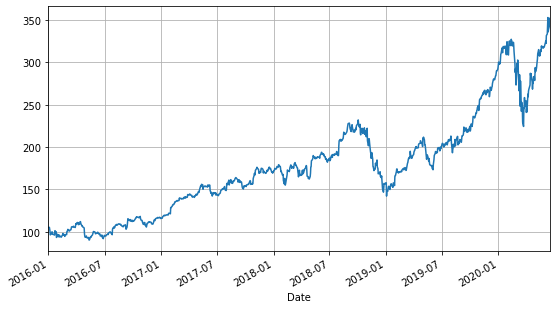

In [23]:
apple['Close'].plot(figsize=(9, 5), grid=True)
plt.show()

### 平均移动线MA

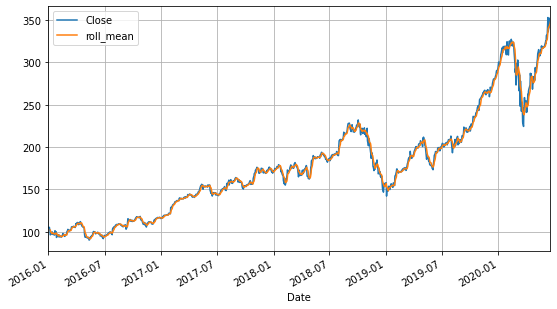

In [27]:
apple['roll_mean'] = apple['Close'].rolling(window=5).mean()
apple[['Close', 'roll_mean']].plot(subplots=False, figsize=(9, 5), grid=True)
plt.show()

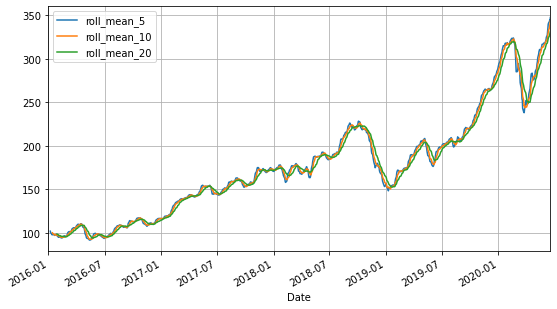

In [28]:
windowsize = [5,10,20]
for i in windowsize:
    apple['roll_mean_'+str(i)] = apple['Close'].rolling(i).mean()
apple[['roll_mean_5','roll_mean_10','roll_mean_20']].plot(figsize=(9, 5), grid=True)
plt.show()

# 扩展函数 expanding
rolling()函数，是固定窗口大小，进行滑动计算

expanding()函数只设置最小的观测值数量，不固定窗口大小，实现累计计算，类似cumsum()函数的累计求和

当rolling()函数的参数window=len(df)时，实现的效果与expanding()函数是一样的

In [15]:
df = pd.DataFrame(np.random.randn(10, 4),
                  index = pd.date_range('1/1/2018', periods=10),
                  columns = ['A', 'B', 'C', 'D'])

In [16]:
df.expanding(min_periods=2).mean()

,A,B,C,D
2018-01-01,NaN,NaN,NaN,NaN
2018-01-02,-1.026829,-0.665463,-0.618854,-0.875889
2018-01-03,-0.770021,-0.626487,-0.241335,0.128804
2018-01-04,-0.544759,-0.644218,-0.328356,0.872284
2018-01-05,-0.239723,-0.061582,-0.302294,0.829720
2018-01-06,-0.304276,-0.280378,-0.233253,0.560917
2018-01-07,-0.003635,0.101279,-0.163783,0.435062
2018-01-08,-0.049303,-0.008288,-0.010624,0.235054
2018-01-09,-0.076178,0.145932,-0.002251,0.180662
2018-01-10,-0.071408,0.050403,-0.041992,0.124192
